# Machine Learning II Project - UrbanSound8K dataset

#### Work done by: Ana Pinto (202105085) |  Miguel Santos (202105289) | Tomás Rodrigues (202107937)
#### Date: 05/12/2023

### Index

8. [CNN Classifier](#CNN)<br>
    8.1 [Loading Dataset](#Dataset)<br>
    8.2 [Model Design](#Model)<br>
9. [Training & Results](#Results)<br>
     9.1 [Accuracys, Losses and Confusions Matrix](#AL)<br>
        9.1.1 [Final Confusion Matrix](#FCM)<br>
    9.2 [Other Metrics](#Metrics)<br>
10. [Conclusions](#Conclusions)<br>
11. [Bibliography & Sources](#References)<br>
[Bonus](#Bonus)<br>

<a id='CNN'></a>

## 8. CNN Classifier

Convolutional Neural Network is a kind of deep learning algorithm specialized in picture transformation, recognition and categorisation. However CNN can adaptively assign different weights and biases to specific features or objects present within an input image, whereas traditional filters need manual preparation. Unlike most classification methods, this distinctive ability minimizes preprocessing. 

CNN has 3-main and two sub-layers:

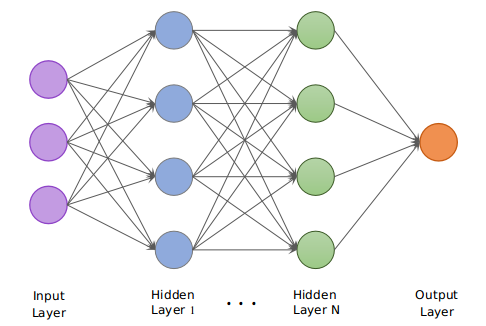

Fig. 3 - CNN layers

Input layer: A matrix that accepts pixels of the image. CNN, which receives 2-dimensional data as input and passes it on to the appropriate layers through its input layer.
Hidden layer: involves calculation and some manipulations in order to extract certain features. There are multiple hidden layers that can perform feature extraction, they are:
- Convolutional layer
- Relu Layer
- Pooling layer
Output layer: a layer with fully connected that will detect an object in the image.

The CNN model will be tuned using Adam optimization, we will use sparse categorical cross entropy as our loss function and we will use sparse categorical accuracy to analyze the performance of our model.


<a id='Dataset'></a>

### 8.1 Loading Dataset

Imports that are needed for the code below

In [1]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Activation, Flatten
import random
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
import seaborn as sns
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization

Open the dataset that was created in the previous notebook

In [2]:
with open('dataset_cnn.pkl', 'rb') as file:
    dataset = pickle.load(file)

See the shape of the dataset

In [3]:
sound = np.array(dataset[0][0])
print(sound.shape)
input_shape = (sound.shape[1], sound.shape[2])

(873, 20, 345)


- Each sound is represented by a 2x2 matrix, which is a 20x345 numeric translation of the MFCC spectrogram.

<a id='Model'></a>

### 8.2 Model Design

We define a model with 3 convolutional layers, 2 max pooling layers, 2 dropout layers, 1 flatten layer, 2 dense layers and 1 output layer.

- Conv2D Layer (Input Layer):
   This layer applies 32 convolutional filters to the input image with a ReLU activation function. It is designed to capture spatial features.

- MaxPooling2D Layer:
   This layer performs max pooling on the output of the previous layer, reducing the spatial dimensions by taking the maximum value in each 2x2 region. It helps reduce computational complexity and makes the network more robust.

- Dropout Layer:
   Dropout is applied to prevent overfitting. It randomly sets a fraction of input units to zero during training, which helps the model generalize better.

- Flatten Layer::
   This layer flattens the output from the previous layer into a one-dimensional vector. It prepares the data for input to the densely connected layers.

- Dense Layer:
   A densely connected layer with 128 neurons and a ReLU activation function. It aims to capture complex patterns in the data.

- Dropout Layer:
   Another dropout layer applied to prevent overfitting before the final output layer.

- Dense Layer:
   The final layer with 10 neurons, representing the 10 classes. It uses the softmax activation function to output probabilities for each class.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 343, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 171, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 171, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 49248)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6303872   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

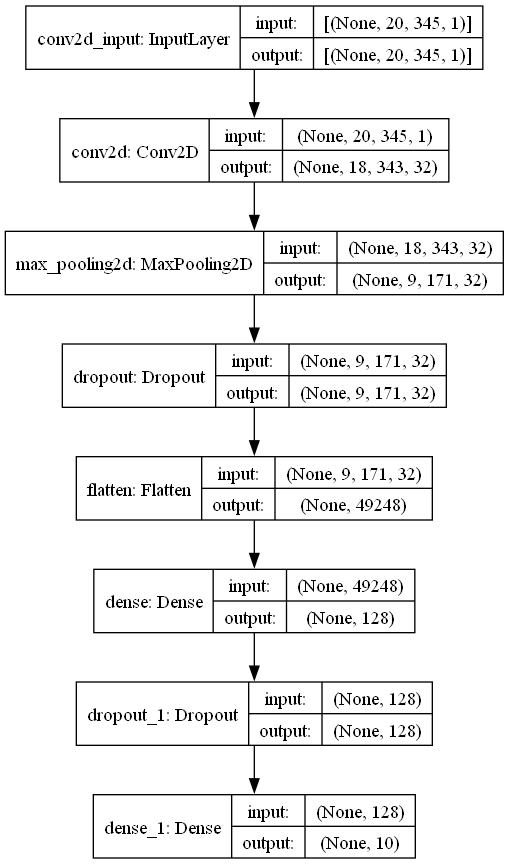

In [ ]:

def get_model():

    CNNmodel = Sequential()
    CNNmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 345, 1)))
    CNNmodel.add(MaxPooling2D((2, 2)))
    CNNmodel.add(Dropout(0.25))

    CNNmodel.add(Flatten())
    CNNmodel.add(Dense(128, activation='relu'))
    CNNmodel.add(Dropout(0.5))
    CNNmodel.add(Dense(10, activation='softmax'))

    CNNmodel.summary()
    return CNNmodel

model = get_model()
model.summary()

keras.utils.plot_model(model, "model_cnn.png", show_shapes=True)

<a id='Training'></a>


## 9. Training & Results

We divide the folds into three sets: train_set (8 folds), val_set (1 fold), test_set (1 fold).
Then we show the plots of the training and validation losses, accuracies and confusion matrix of the test set for each fold.
This way, we can see the evolution of the model and the results of each fold.

<a id='AL'></a>

### 9.1 Accuracys, Losses and Confusions Matrix

After training the model, we plot the training and validation losses and accuracies for each fold and the confusion matrix of the test set for each fold.



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 18, 343, 32)       320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 171, 32)       0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 9, 171, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 49248)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               6303872   
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                      

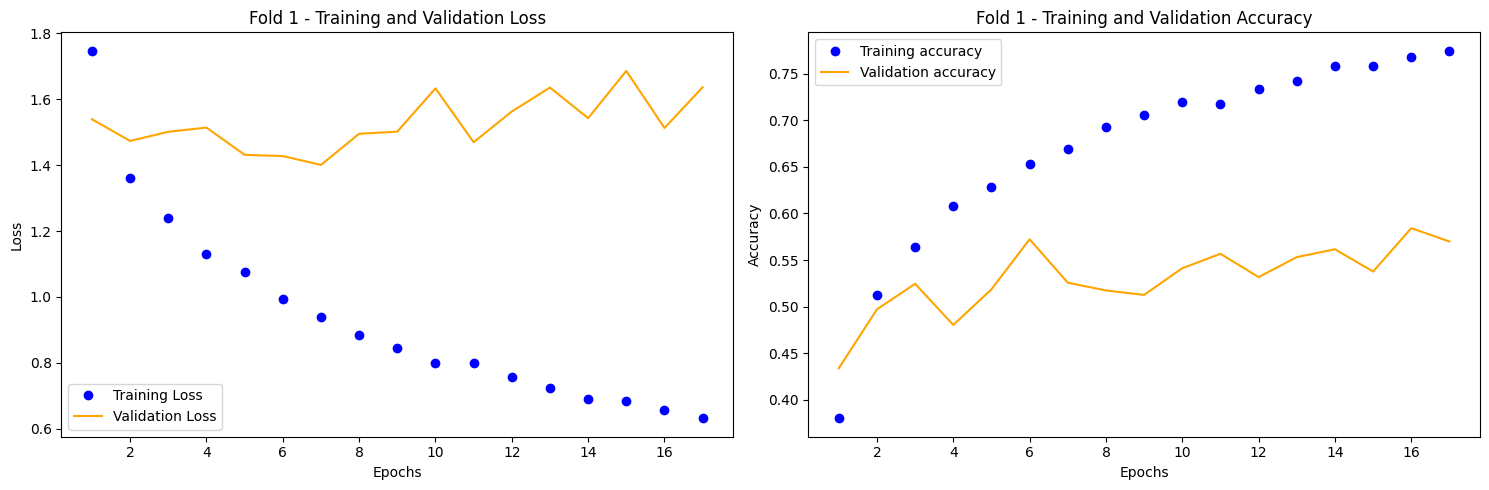

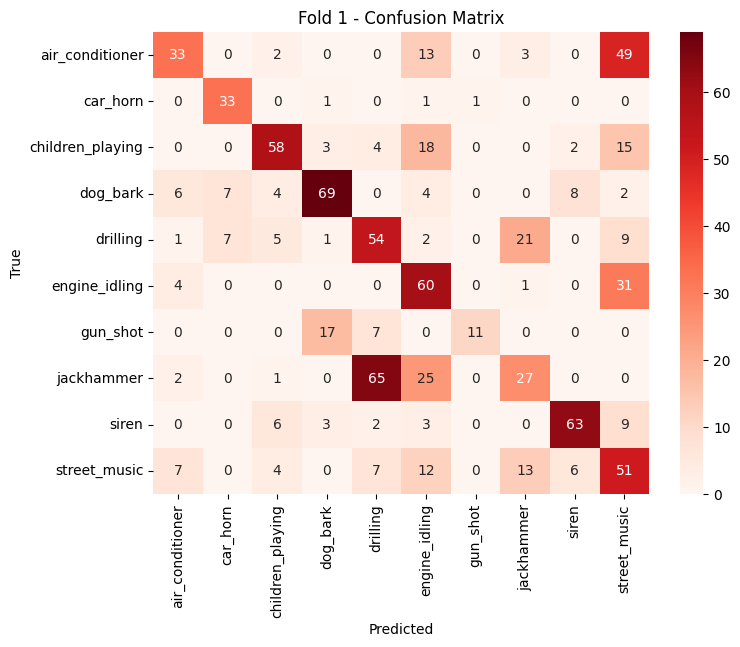

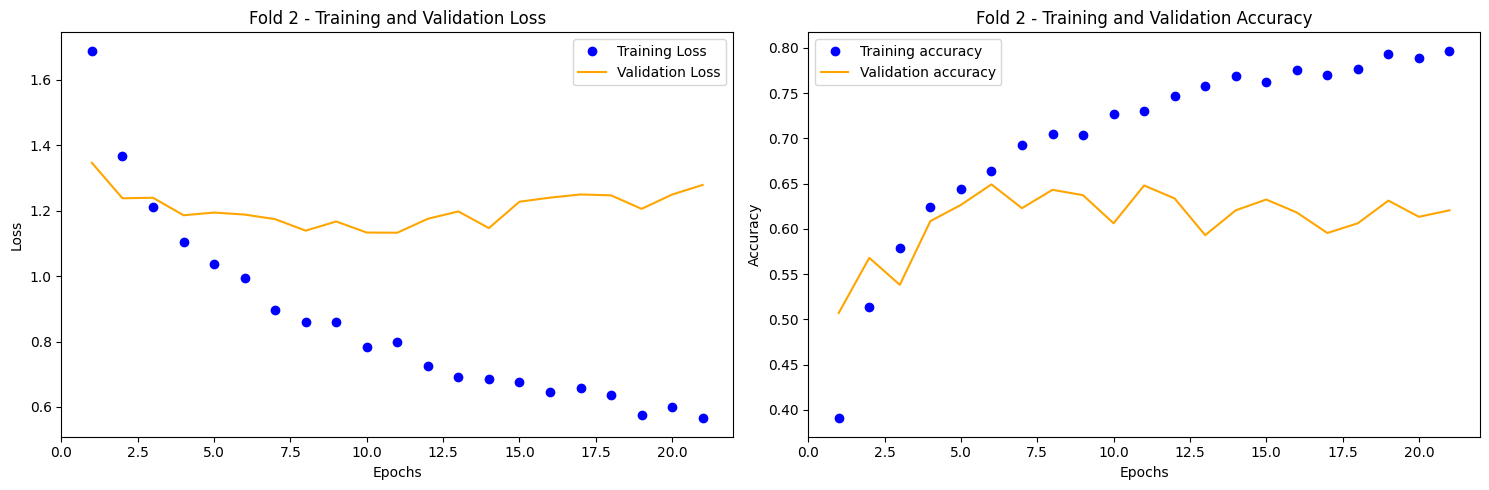

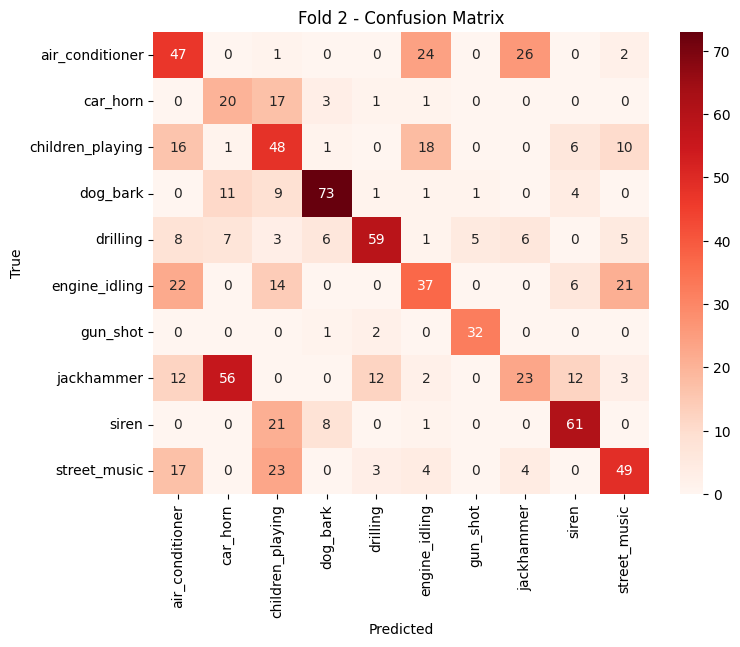

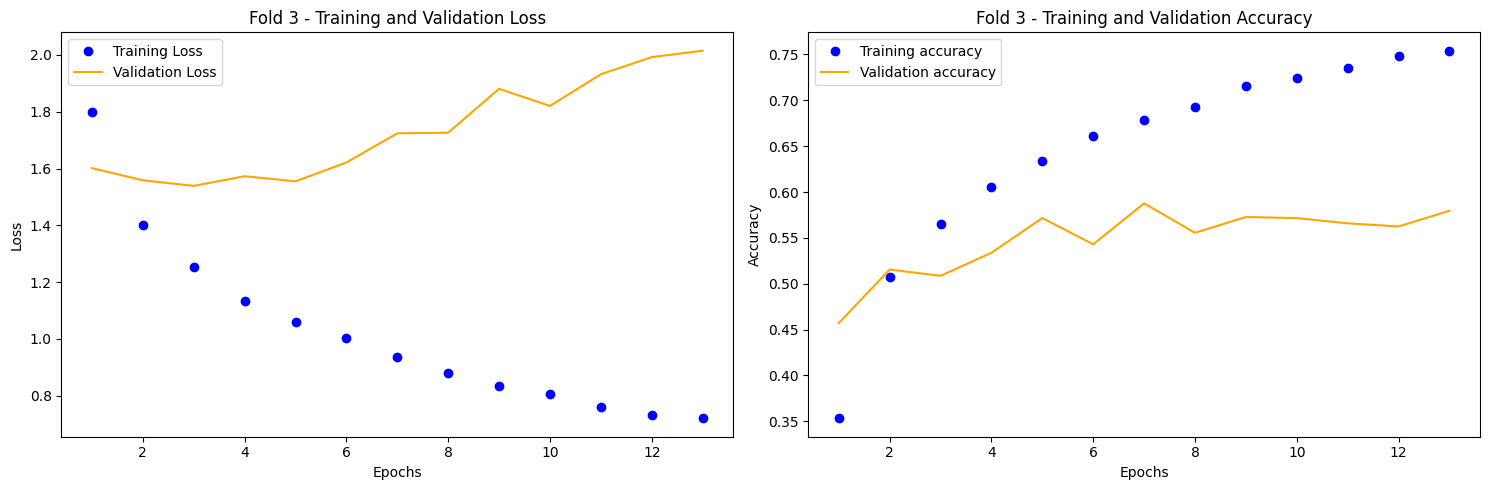

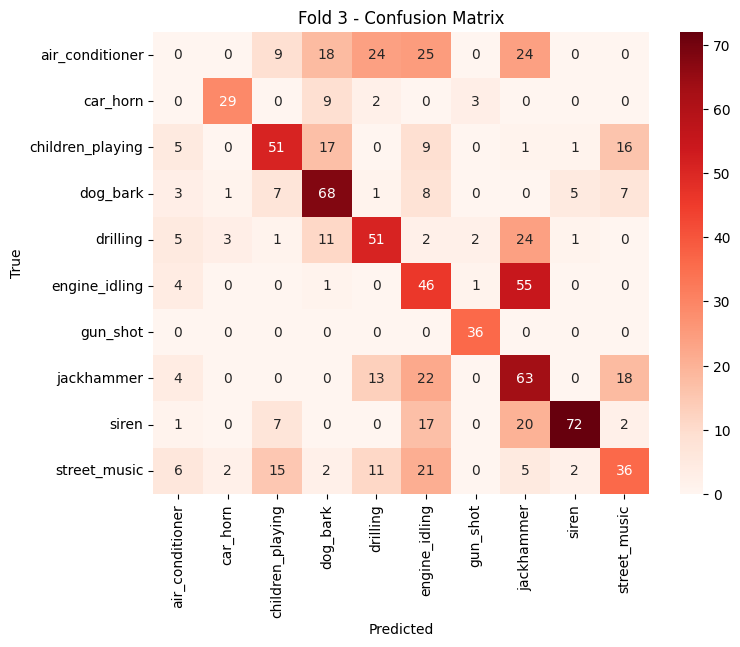

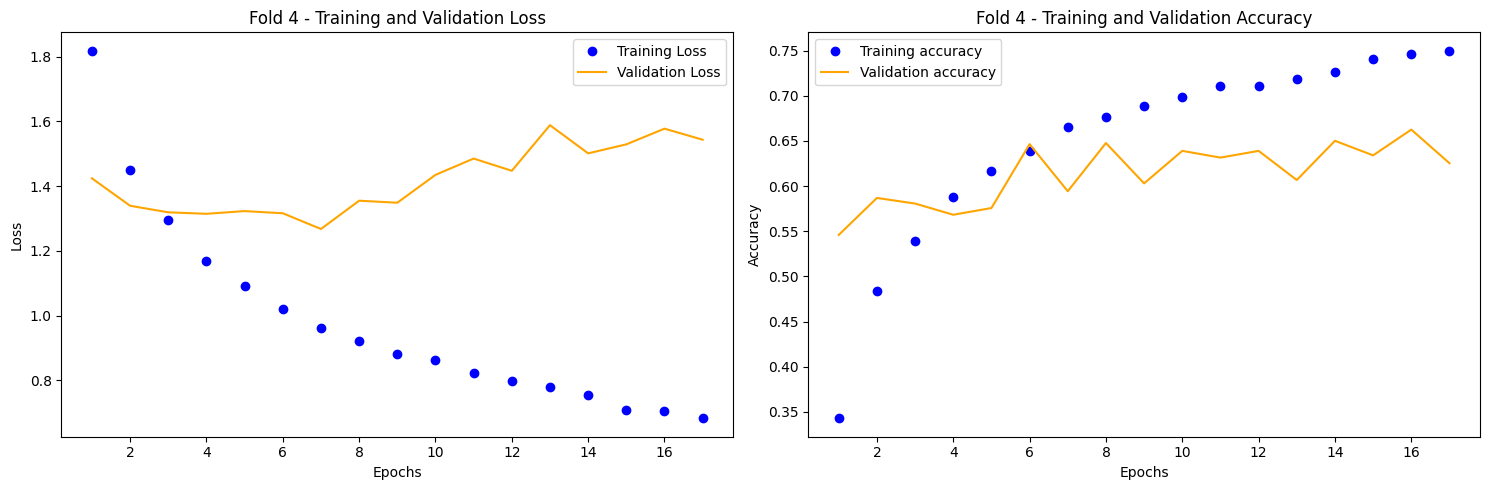

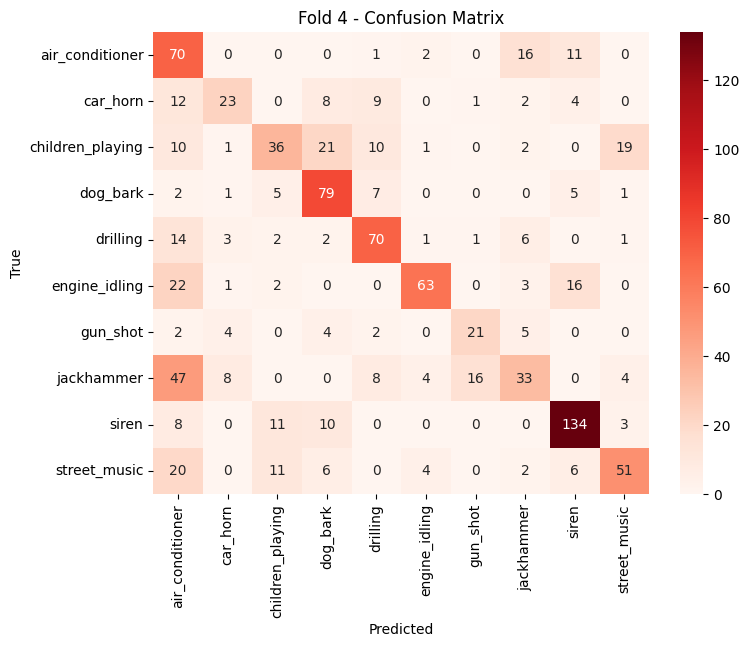

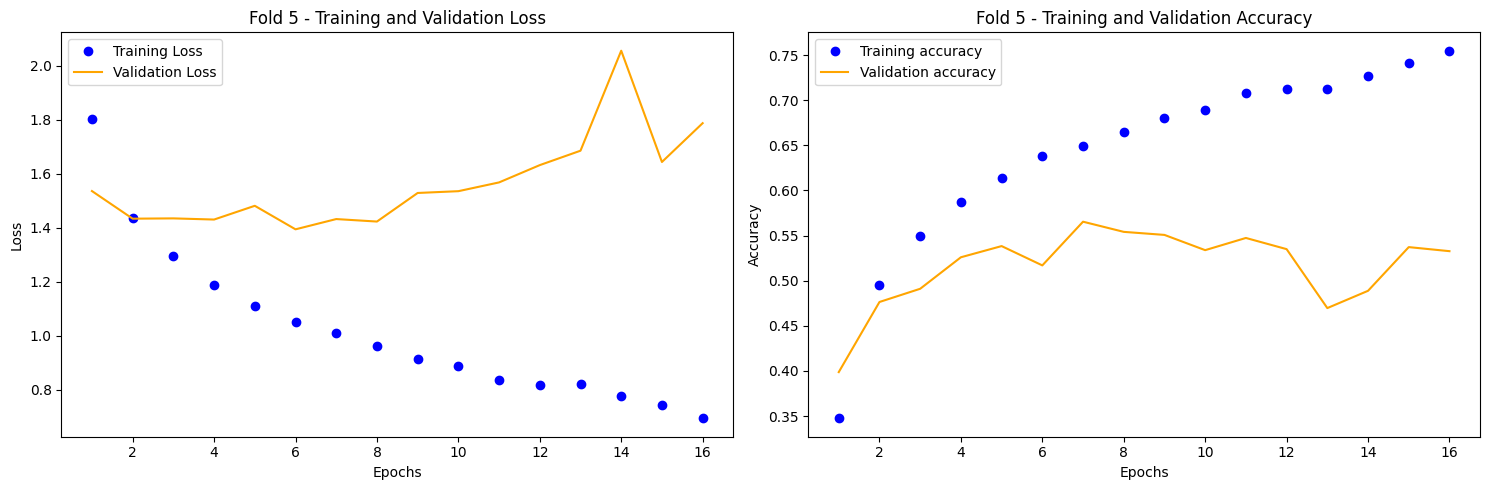

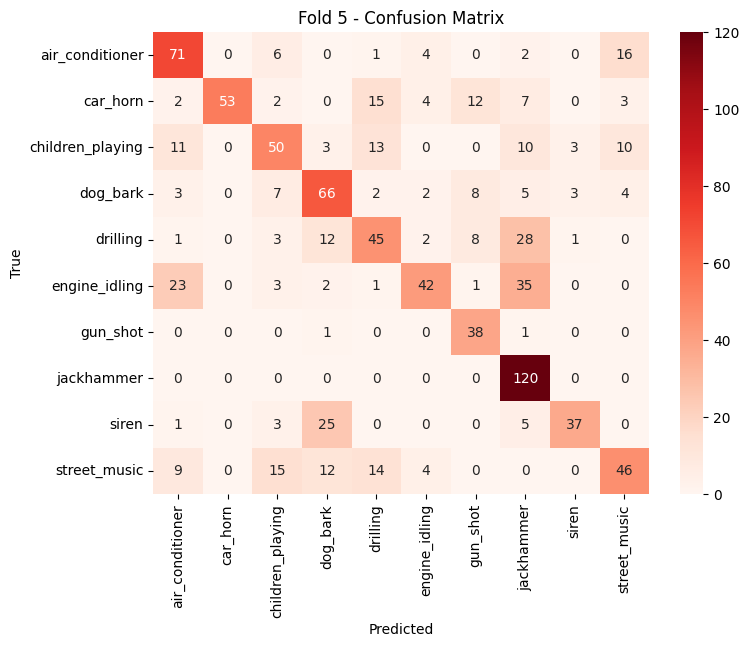

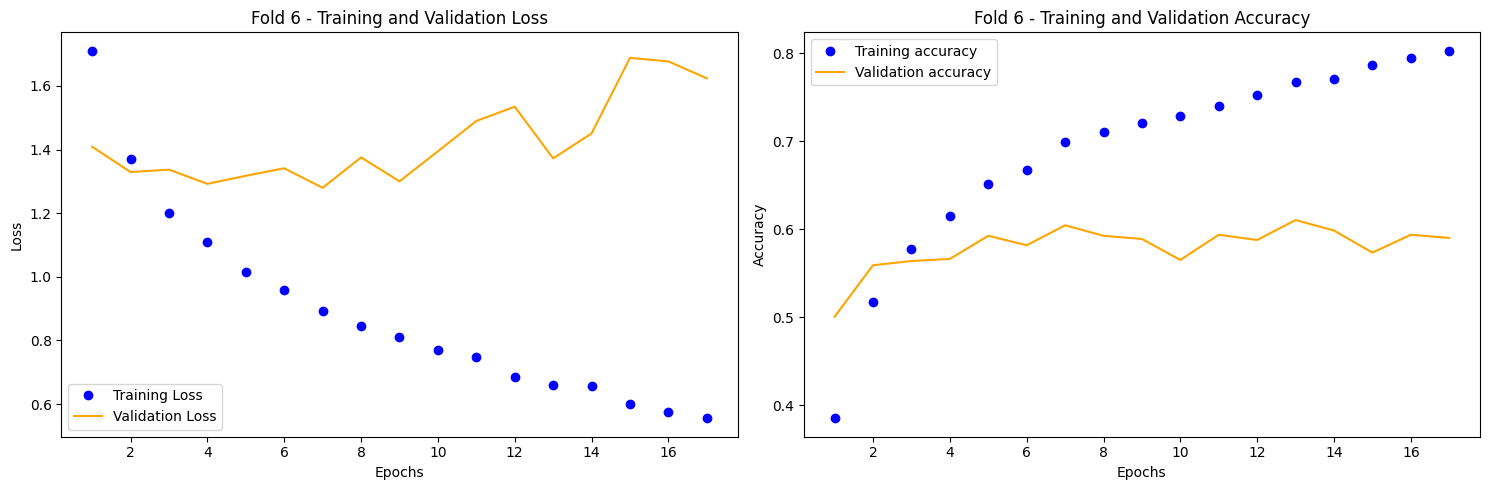

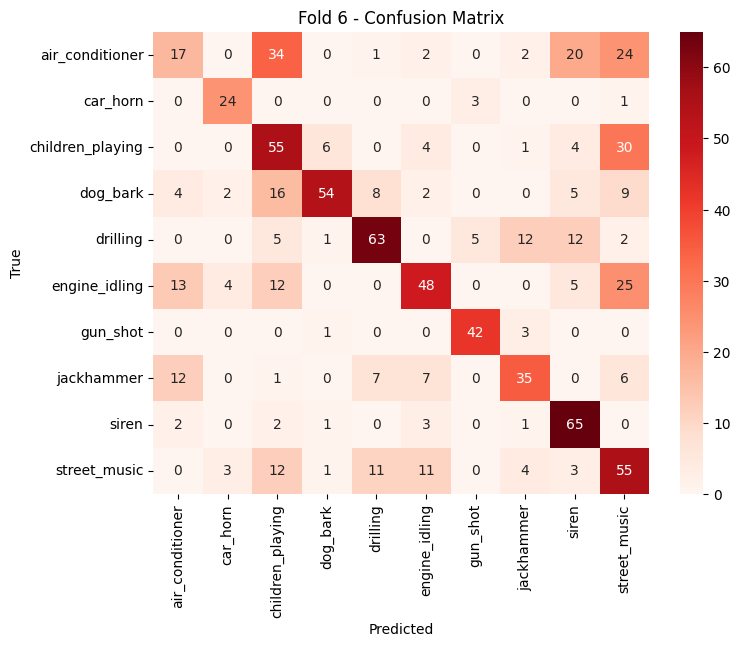

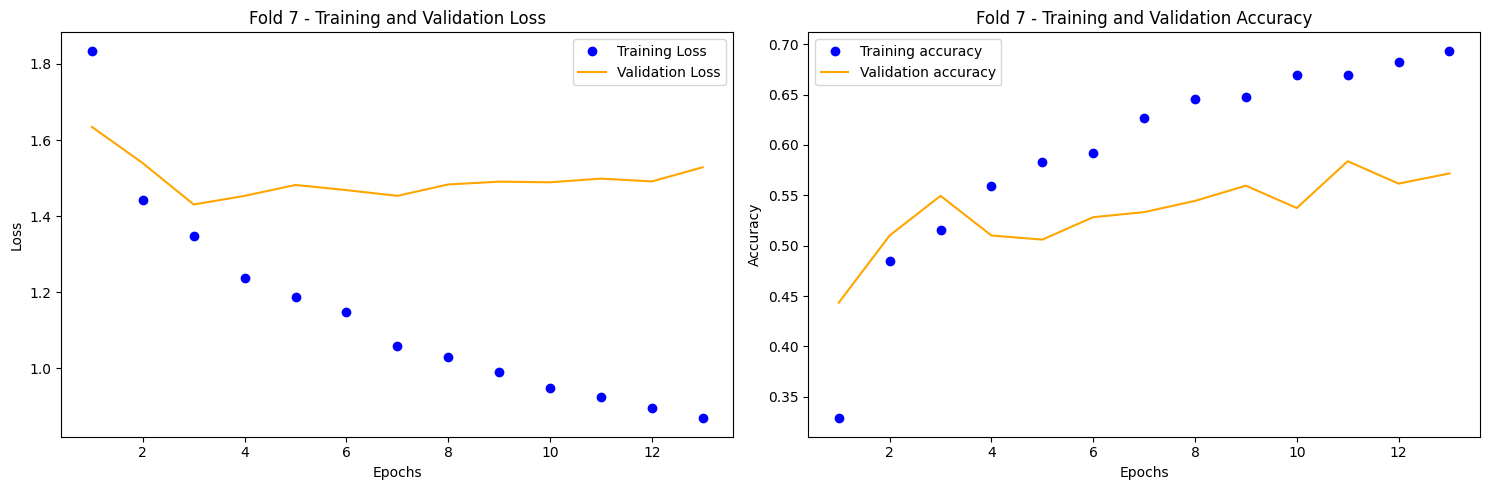

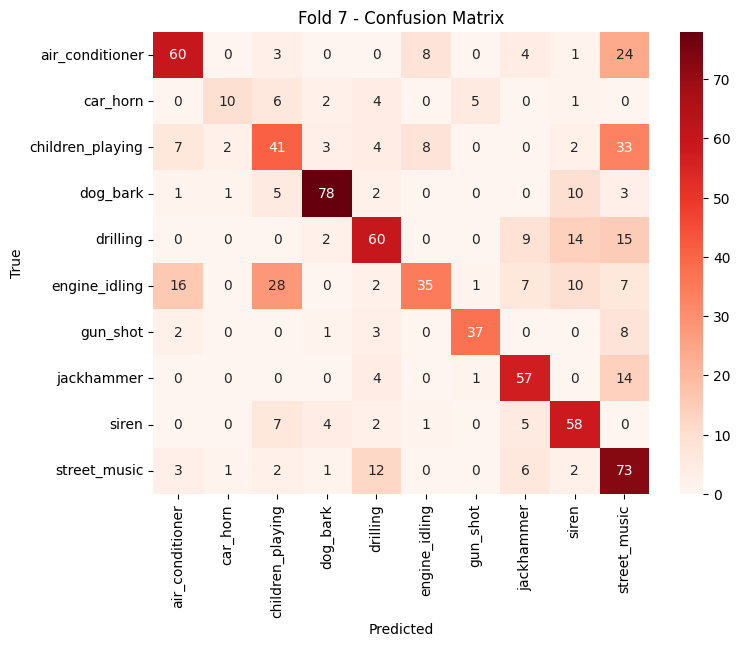

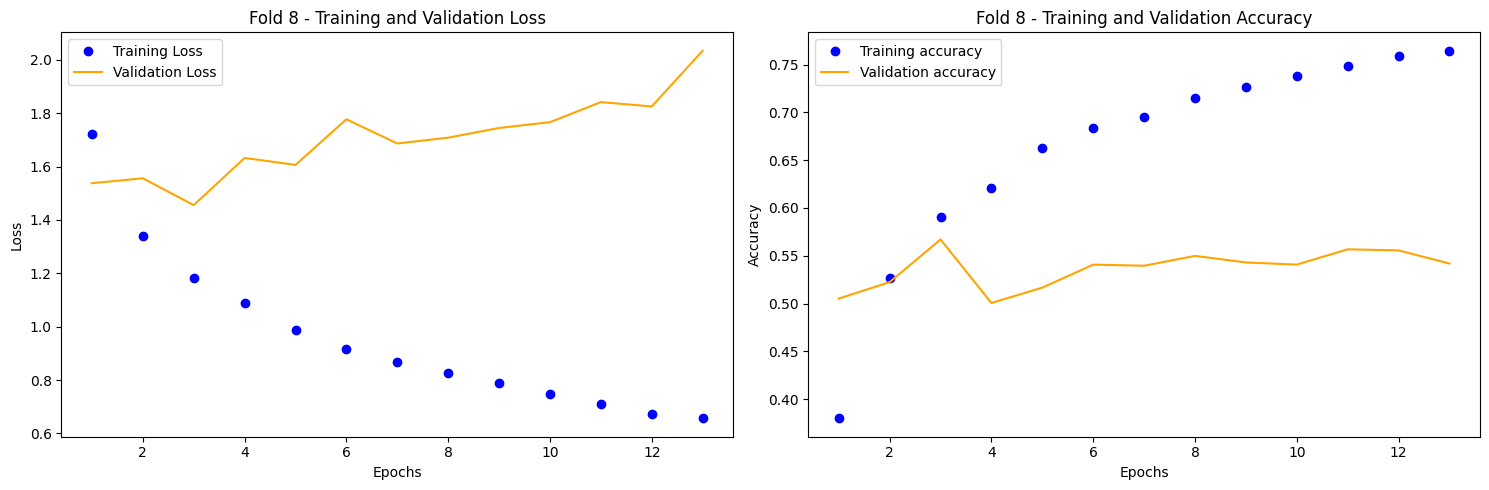

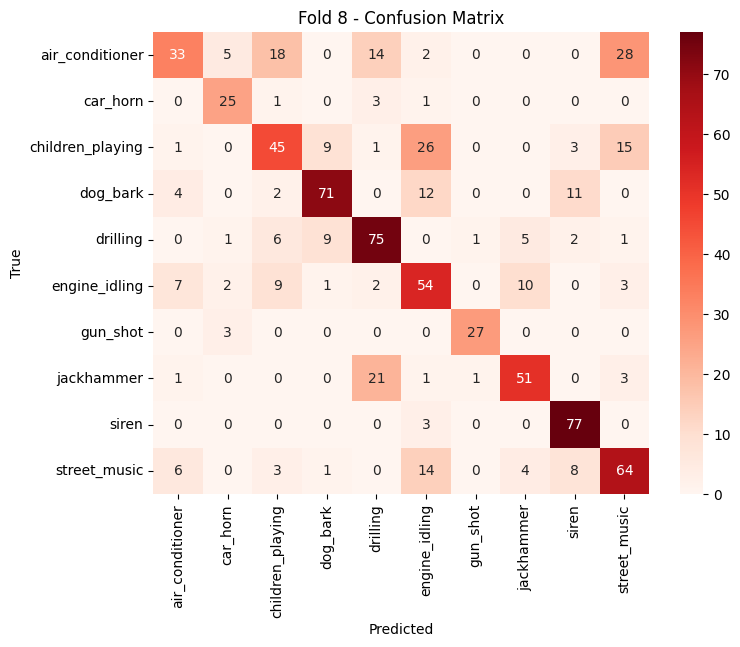

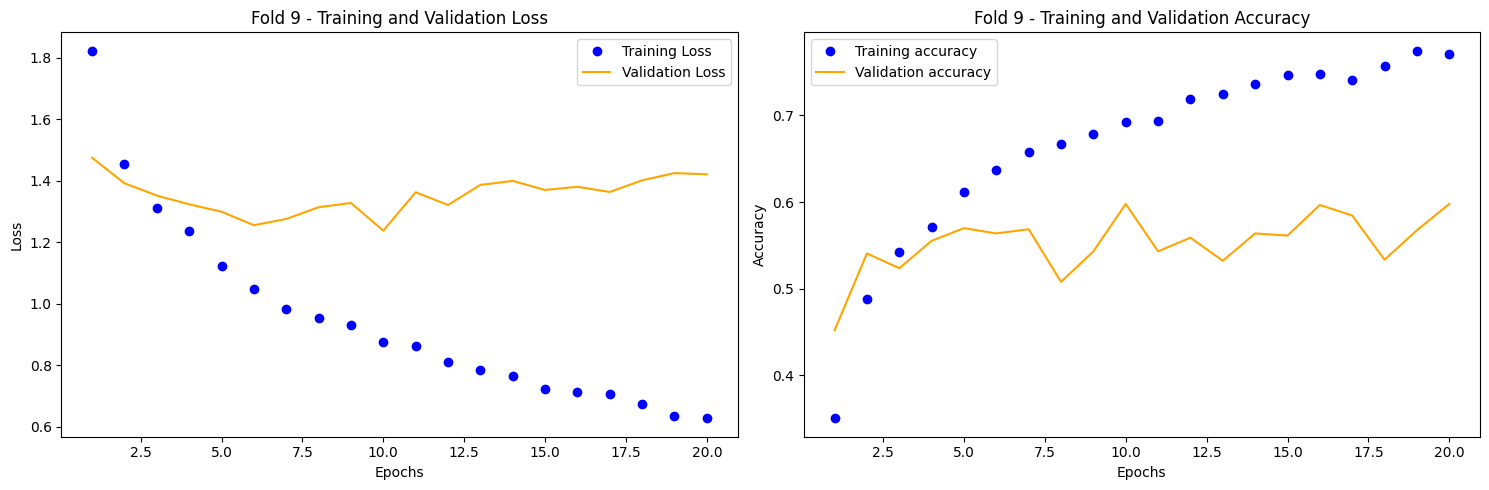

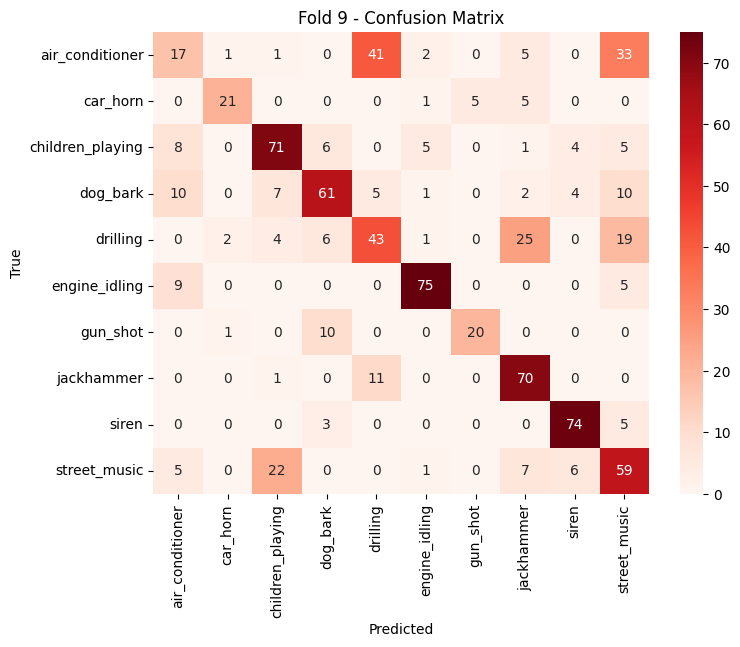

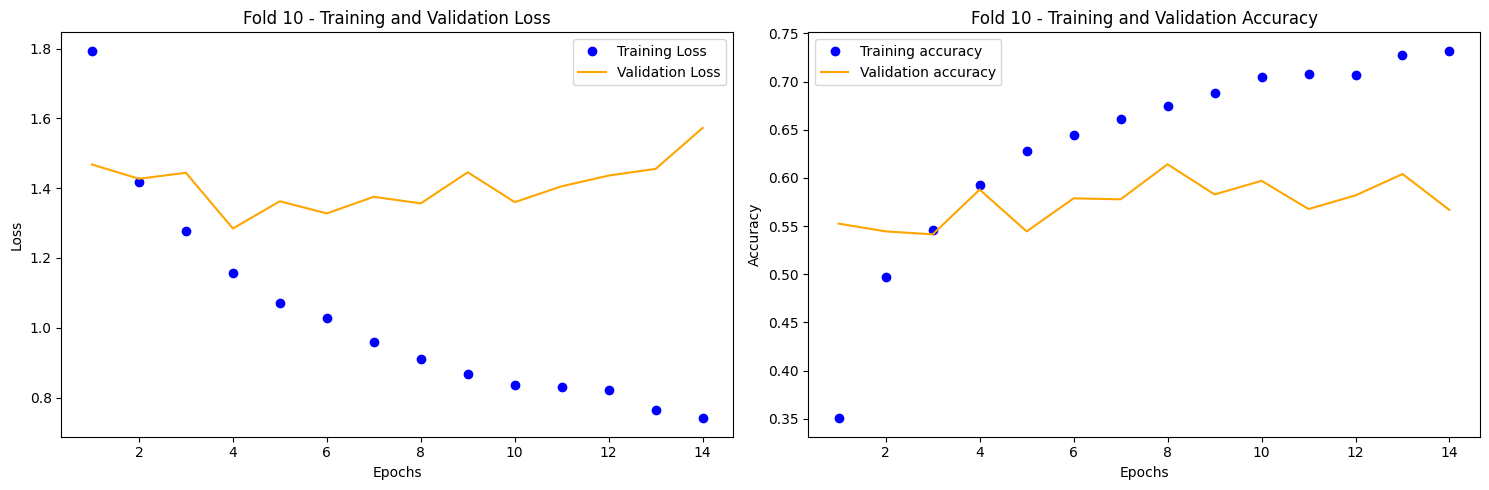

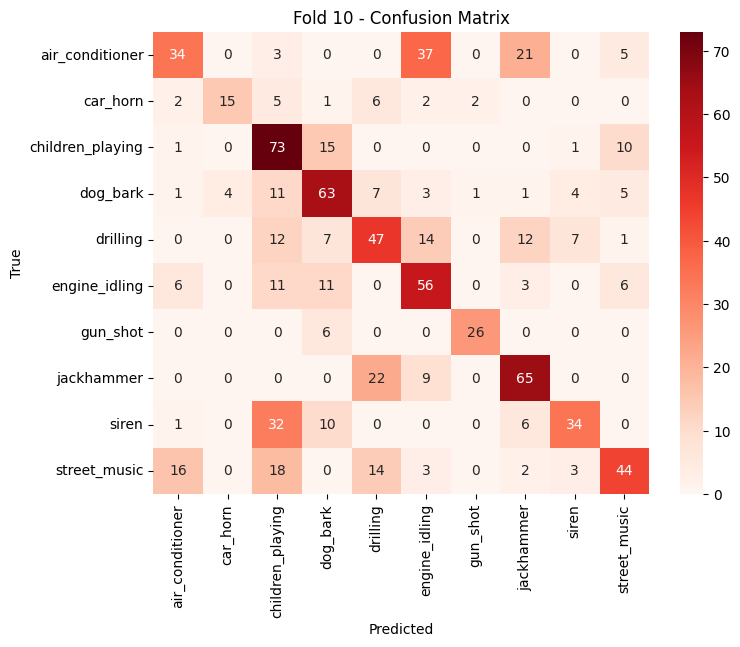

In [26]:

# Lists to store metrics for each fold
accuracies_test = []
accuracies_val = []
accuracies_train = []

# Lists to store metrics for each fold
precisions = []
f1_scores = []
recalls = []

# Lists to store plots for each fold
accuracy_plots = []
loss_plots = []
confusion_matrix_plots = []

class_labels = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']
total_confusion_matrix = np.zeros((len(class_labels), len(class_labels)), dtype=int)
class_counts = np.zeros(len(class_labels), dtype=int)


for i in range(10):
    fold_num = i
    data=copy.deepcopy(dataset)
    X_test,y_test = data.pop(i)
    val= random.randint(0,8)
    X_val,y_val = data.pop(val)
    X_train= np.asarray(data[7][0])
    y_train= np.asarray(data[7][1])
    for d in range(7):
        X_train=np.concatenate((X_train,np.asarray(data[d][0])),axis=0)
        y_train=np.concatenate((y_train,np.asarray(data[d][1])),axis=0)
        
    model= get_model()
    
    start = datetime.now()
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['sparse_categorical_accuracy'])
    
    history=model.fit(X_train, y_train, epochs=50,validation_data= (np.asarray(X_val), np.asarray(y_val)),batch_size=100,callbacks=[early_stopping])
    duration = datetime.now() - start
    print("Training for fold {} finished in time: {}".format(fold_num + 1, duration))

    
    # Plot training and validation accuracy and loss over epochs
    history_dict=history.history
    loss_values=history_dict['loss']
    acc_values=history_dict['sparse_categorical_accuracy']
    val_loss_values = history_dict['val_loss']
    val_acc_values=history_dict['val_sparse_categorical_accuracy']
    epochs=range(1,len(loss_values)+1)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    
    # Plot Validation and Trainig Loss
    ax1.plot(epochs,loss_values,'bo',label='Training Loss')
    ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
    ax1.set_title('Fold {} - Training and Validation Loss'.format(fold_num + 1))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    #Plot Validation and Trainig Accuracy
    ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
    ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
    ax2.set_title('Fold {} - Training and Validation Accuracy'.format(fold_num + 1))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    
    # Append the accuracy and loss plots for later display
    accuracy_plots.append(fig)

    X_test = np.asarray(X_test)
    y_test = np.asarray(y_test)
    
    # Evaluate on the test set
    test_score = model.evaluate(X_test, y_test, verbose=0)
    test_accuracy = 100 * test_score[1]
    accuracies_test.append(test_accuracy)
    accuracies_train.append(history.history['sparse_categorical_accuracy'][-1])
    accuracies_val.append(history.history['val_sparse_categorical_accuracy'][-1])
    print("Test accuracy for fold {}: {:.4f}%".format(fold_num + 1, test_accuracy))

    # Compute and plot the confusion matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_true_classes = y_test
    cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(len(class_labels)))

    # Update thw final confusion matrix
    total_confusion_matrix += cm
    class_counts += np.sum(cm, axis=1)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Fold {} - Confusion Matrix'.format(fold_num + 1))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Append the confusion matrix plot for later display
    confusion_matrix_plots.append(plt.gcf())

    # Calculate precision, F1 score, and recall
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

    precisions.append(precision)
    f1_scores.append(f1)
    recalls.append(recall)
    

# Display all the plots at the end
for i, accuracy_plot in enumerate(accuracy_plots):
    plt.show()

for i, confusion_matrix_plot in enumerate(confusion_matrix_plots):
    plt.show()


<a id='FCM'></a>

##### 9.1.1 Final Confusion Matrix
Display the confusion matrix of all folds.

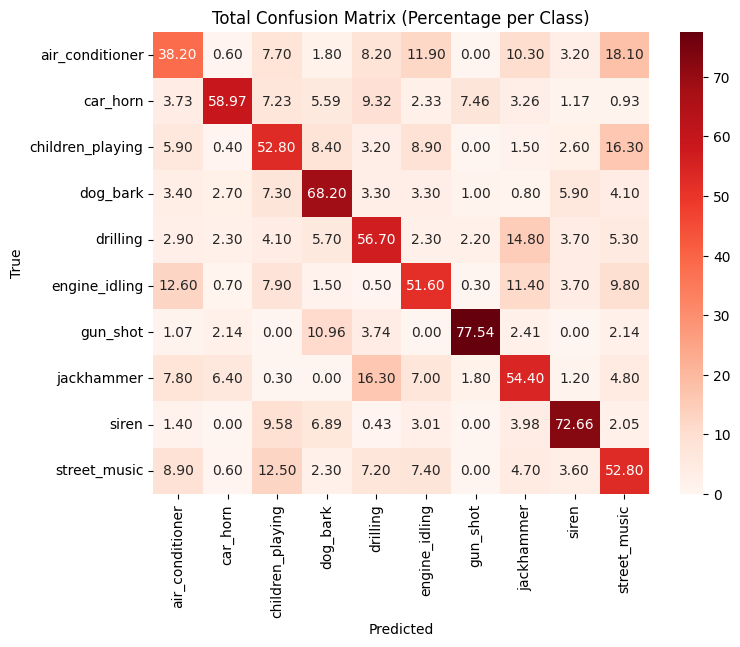

In [27]:
# Covert confusion matrix to percentages
total_confusion_matrix_percent = (total_confusion_matrix / class_counts[:, np.newaxis]) * 100

# Plot the total confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix_percent, annot=True, fmt='.2f', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Total Confusion Matrix (Percentage per Class)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<a id='Metrics'></a>

#### 9.2 Other Metrics
We calculate the precision, recall, f1-score and support for each fold and the average of all folds.

In [28]:
data = {'Metric': ['Average Test Accuracy','Standard Deviation','Average Train Accuracy', 'Average Validation Accuracy', 'Average Precision', 'Average F1 Score', 'Average Recall'],
    'Value': [np.mean(accuracies_test),np.std(accuracies_test) ,np.mean(accuracies_train)*100, np.mean(accuracies_val)*100, np.mean(precisions)* 100, np.mean(f1_scores)*100, np.mean(recalls)*100]}

df = pd.DataFrame(data)
df

,Metric,Value
0,Average Test Accuracy,56.965136
1,Standard Deviation,5.066700
2,Average Train Accuracy,75.939315
3,Average Validation Accuracy,57.962056
4,Average Precision,58.974029
5,Average F1 Score,56.400362
6,Average Recall,56.965136


<a id='Conclusions'></a>

### 10. Conclusions

- According to the results obtained:


| Metric | Value |
| :-: | :-: |
|Average Test Accuracy | 56.965136
|Test Accuracy Standard Deviation | 5.066700
|Average Train Accuracy | 75.939315
|Average Validation Accuracy | 57.962056
|Average Precision | 58.974029
|Average F1 Score | 56.400362
|Average Recall | 56.965136

Our model, considering it is a ten-class classification task, had a decent performance. Taking into account that there was overfitting (test and validation accuracy is considerably lower than training accuracy), the validation loss was increasing over time, and that was not what we expected. Looking into the final confusion matrix, in most of the cases, our model was able to make correct predictions. The deviation does not have an impact on the test accuracy; once it is low, the accuracy will be maintained in the (+/-) values ~= [51, 61].

- We tried to add new layers based on other projects; batch normalization, but it just increased the running time and not improved anything. So, we decided to use a simpler model to try to avoid overfitting and reduce computational costs (the simpler one still took a long time to run).

- The best predicted classes were gun_shot, siren, and dog_bark.

- Comparing to the previous notebook, we can see that the results are better, but not by much. So we conclude that the CNN model is better for this task.

<a id='References'></a>

### 11. Bibliography & Sources

- shah, U. (2022, September 5). Using deep learning for audio classification of urban8k dataset based on the Mel-Frequency Cepstral. Medium.
https://medium.com/@ujjawalshah1080/using-deep-learning-for-audio-classification-of-urban8k-dataset-based-on-the-mel-frequency-cepstral-7cc52f55a97

- Smales, M. (2021, February 12). Sound Classification using Deep Learning. Medium. 
https://mikesmales.medium.com/sound-classification-using-deep-learning-8bc2aa1990b7

- Rosebrock, A. (2021, May 14). Convolutional Neural Networks (CNNs) and Layer Types. PyImageSearch. 
https://pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/

- tf.keras.metrics.SparseCategoricalAccuracy | TensorFlow Core v2.5.0. (n.d.). TensorFlow. 
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy

- Kim, R. (2021, June 23). Urban Sound Classification — Part 1: sound wave, digital audio signal. Medium. https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9

  Images‌:
- Fig. 1 - https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9 (in notebook: data-analysis&pre-processing.ipynb)

- Fig. 2 - https://www.educative.io/answers/what-is-a-multi-layered-perceptron (in notebook: mlp.ipynb)

- Fig. 3 - https://miro.medium.com/v2/resize:fit:486/1*LDCJi2qrSNqi6X-w3X2o2A.png (in this notebook: cnn.ipynb)

‌

<a id='Bonus'></a>

## Bonus

- We use the attack model FGSM from tensorflow to test our model robustness.

In [ ]:
def create_adversarial_pattern(input_image, input_label,model):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad
x= np.asarray(X_test)
y=np.asarray(y_test)
x_reshaped = x.reshape(-1, 20, 345, 1)

# Create adversarial pattern
perturbations = create_adversarial_pattern(tf.convert_to_tensor(x_reshaped), tf.convert_to_tensor(y), model)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]
def display_images(image, p, model, label):
    adv_values = []
    
    # Ensure the input image has the correct shape
    image = tf.convert_to_tensor(image.reshape(1, 20, 345, 1))

    confidence = model.predict(image, verbose=0)
    true_value = confidence[0][label]

    epsilons = [0, 0.01, 0.1, 0.15]

    for i, eps in enumerate(epsilons):
        adv_x = image + eps * p
        adv_x = tf.clip_by_value(adv_x, -1, 1)

        confidence_adv = model.predict(adv_x, verbose=0)
        confidence_adv_max_value = confidence_adv[0][label]

        adv_values.append(confidence_adv_max_value)

    epsilons = [-0.05] + epsilons
    adv_values = [true_value] + adv_values
    plt.figure(figsize=(10, 5))
    plt.plot(epsilons, adv_values, marker='o')

    # Adding labels and title
    plt.xlabel('epsilon')
    plt.xticks(epsilons)
    plt.ylabel('Confidence')
    plt.ylim(0, 1)
    plt.title(f'Confidence of adversarial examples for label {label}')

    # Display the plot
    plt.show()


# Display images
display_images(x_reshaped[0], perturbations[0], model, y_test[0])
display_images(x_reshaped[15], perturbations[15], model, y_test[15])
display_images(x_reshaped[30], perturbations[30], model, y_test[30])
display_images(x_reshaped[60], perturbations[60], model, y_test[60])
display_images(x_reshaped[200], perturbations[200], model, y_test[200])

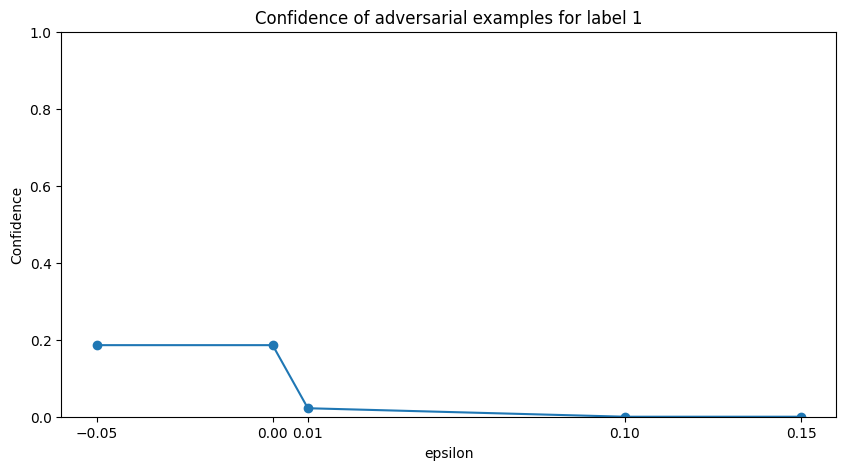

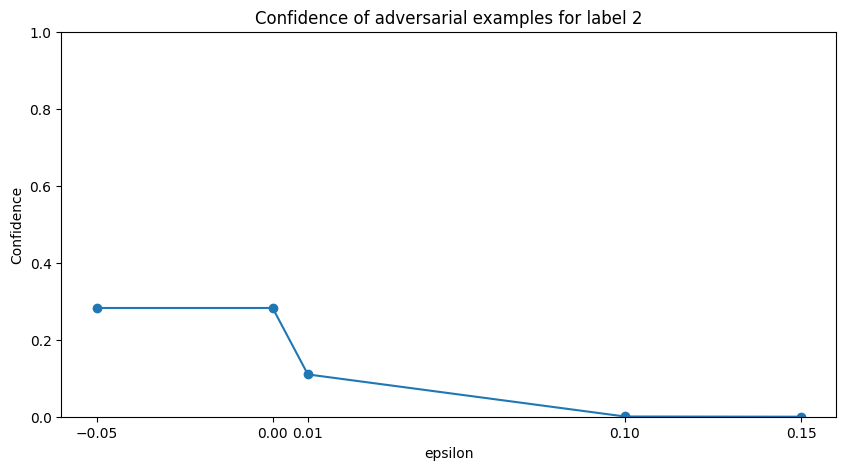

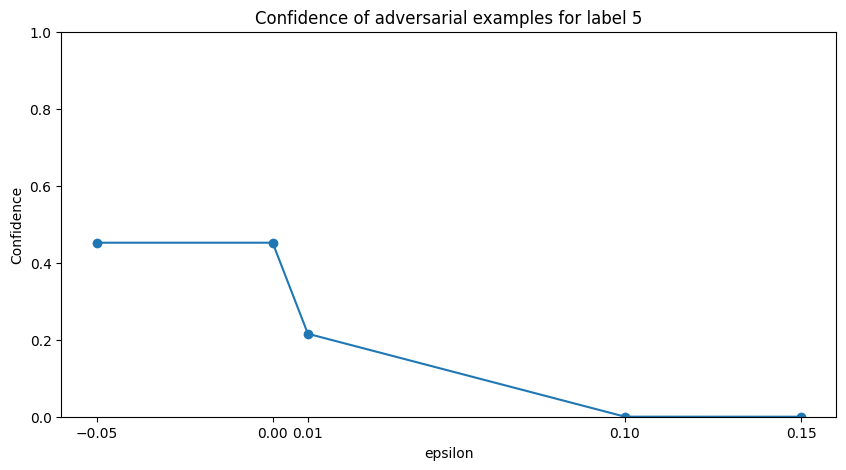

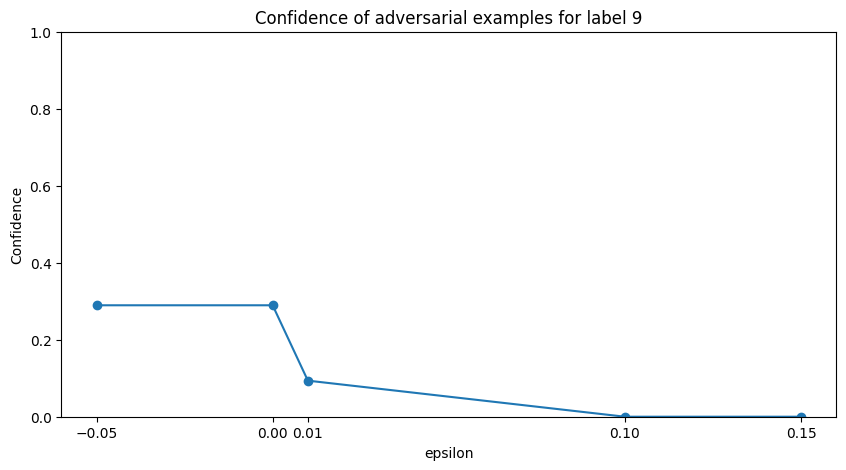

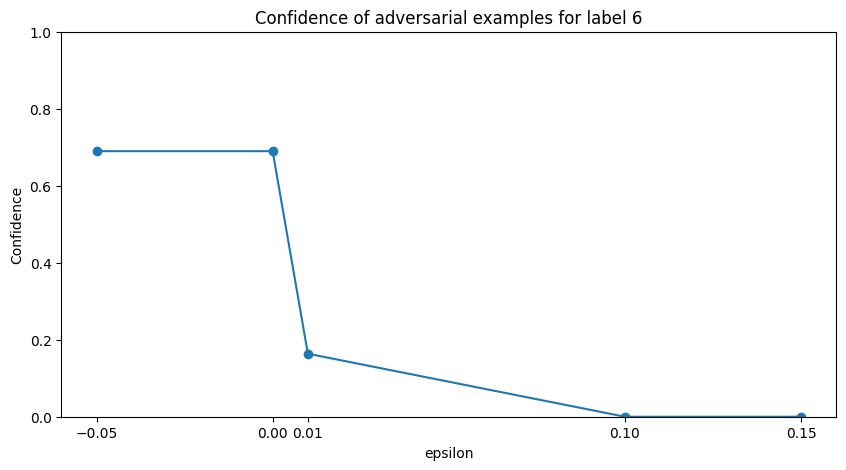

- Based on these results, our CNN is not robust to adversial examples. A small change to the original image causes a great impact on the confidence of the model.